# PROJETO FINAL

# 0.0. IMPORTS

In [ ]:
!pip install requests

In [ ]:
import csv

In [ ]:
import requests as r
import datetime as dt

In [ ]:
from PIL import Image as Image
from IPython.display import display

# 1.0. REQUEST API

In [ ]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get( url )

In [ ]:
resp.status_code

200

# 2.0. DATA LOAD AND DESCRIPTION

In [ ]:
raw_data = resp.json()
raw_data[0]

{'Active': 1,
 'City': '',
 'CityCode': '',
 'Confirmed': 1,
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Date': '2020-02-26T00:00:00Z',
 'Deaths': 0,
 'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Province': '',
 'Recovered': 0}

## 2.1. Data manipulation

In [ ]:
# create dict for new df
final_data = []

# populating df
for obs in raw_data:
  final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date'], ])

In [ ]:
# insert headers
final_data.insert( 0 , ['confirmados', 'mortos', 'recuperados', 'ativos', 'data'])

### 2.1.1 - manipulating dates

In [ ]:
# refering columns
CONFIRMADOS = 0
ÓBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

# filter characters in column date
for i in range( 1, len( final_data) ):
  final_data[i][DATA] = final_data[i][DATA][:10]

In [ ]:
final_data 
# data is str

[['confirmados', 'mortos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05'],
 [13, 0, 0, 13, '2020-03-06'],
 [13, 0, 0, 13, '2020-03-07'],
 [20, 0, 0, 20, '2020-03-08'],
 [25, 0, 0, 25, '2020-03-09'],
 [31, 0, 0, 31, '2020-03-10'],
 [38, 0, 0, 38, '2020-03-11'],
 [52, 0, 0, 52, '2020-03-12'],
 [151, 0, 0, 151, '2020-03-13'],
 [151, 0, 0, 151, '2020-03-14'],
 [162, 0, 0, 162, '2020-03-15'],
 [200, 0, 1, 199, '2020-03-16'],
 [321, 1, 2, 318, '2020-03-17'],
 [372, 3, 2, 367, '2020-03-18'],
 [621, 6, 2, 613, '2020-03-19'],
 [793, 11, 2, 780, '2020-03-20'],
 [1021, 15, 2, 1004, '2020-03-21'],
 [1546, 25, 2, 1519, '2020-03-22'],
 [1924, 34, 2, 1888, '2020-03-23'],
 [2247, 46, 2, 2199, '2020-03-24'],
 [2554, 59, 2, 2493, '2020-03-25'],
 [2985, 77, 6, 2

### 2.1.2. SAVE FINAL_DATA DOCUMENT - CSV

In [ ]:
# open mode writer 'w' and write infos
with open('brasil-covid.csv', 'w') as file:
  writer = csv.writer(file)
  writer.writerows(final_data)

## 2.2. Transform strdate in datatime

In [ ]:
for i in range( 1, len( final_data ) ):
  final_data[i][DATA] = dt.datetime.strptime( final_data[i][DATA], '%Y-%m-%d' )

# 3.0. BUILD HELPER FUNCTIONS

In [ ]:
# build y data - API
def get_datasets(y, labels):      # receive real y_data and label
  if type( y[0] ) == list:        # verify if y_data is List of List ( transform in dict )
    datasets = []                 # If list - inicialize var with y and labels for populate Dict
    for i in range( len( y ) ):
      datasets.append( {          # populate dict
        'label': labels[i],
        'data': y[i]
      } )
    return datasets               # return data
  else:
    return [ {
        'label': [0],
        'data': y
    } ]

In [ ]:
# define title of chart
def set_title(title=''):
  if title != '':
    display = 'true'
  else:
    display = ' false'
  return {
      'title': title,
      'display': display
  }

In [ ]:
# create def of chart according API 
def create_chart(x, y, kind='bar', title=''):

  datasets = get_datasets( y, labels )
  options = set_title( title )

  chart = { 
      'type': kind,
      'data': {
          'labels': x,
          'datasets': datasets
      },
      'options': options
  }
  return chart

In [ ]:
# call the api
def get_api_chart(chart):
  url_base = 'https://quickchart.io/chart'
  resp = r.get( f'{url_base}?c={str( chart ) }' )
  return resp.content

In [ ]:
# save image
def save_image(path, content):
  with open( path, 'wb' ) as image:
    image.write( content )

In [ ]:
# display image
def display_image( path ):
  img_pil = Image.open( path )
  display( img_pil )

# 4.0. GENERATE CHART

In [ ]:
# create Y_values
y_data_1 = []
for obs in final_data[1::10]:
  y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::10]:
  y_data_2.append(obs[RECUPERADOS])

In [ ]:
# create labels
labels = ['Confirmados', 'Recuperados']

In [ ]:
# create x_values
x = []
for obs in final_data[1::10]:
  x.append( obs[DATA].strftime( '%d-%m-%Y' ) )

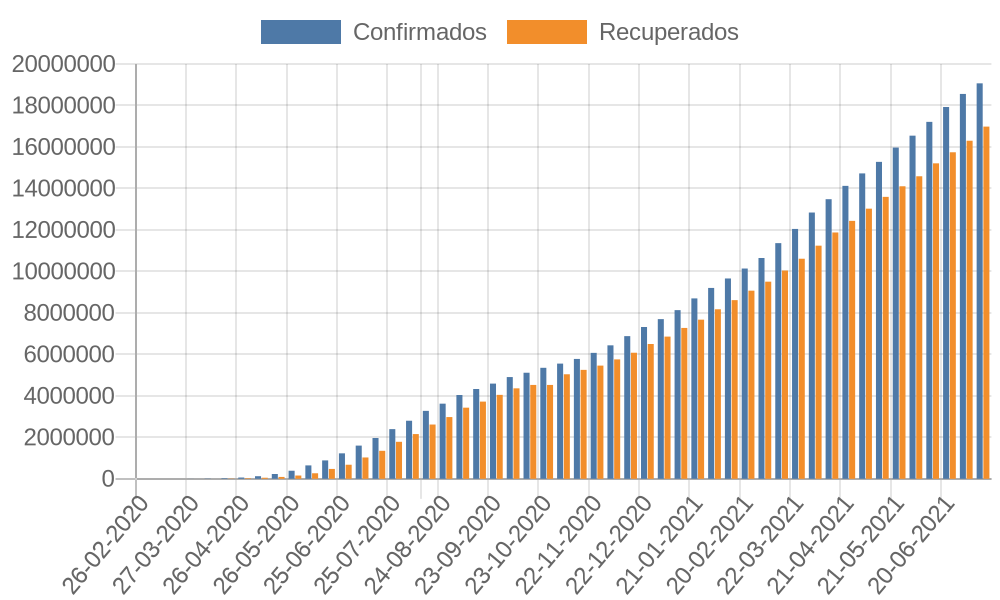

In [ ]:
# generate chart
chart = create_chart( x, [y_data_1, y_data_2], title='Grafico confirmados x recuperados' )
chart_content = get_api_chart( chart )
save_image( 'meu-primeiro-grafico.png', chart_content )
display_image( 'meu-primeiro-grafico.png' )

In [ ]:
from urllib.parse import quote

In [ ]:
def get_api_qrcode( link ):
  text = quote( link )
  url_base = 'https://quickchart.io/qr'
  resp = r.get(f'{ url_base}?text={text}')
  return resp.content

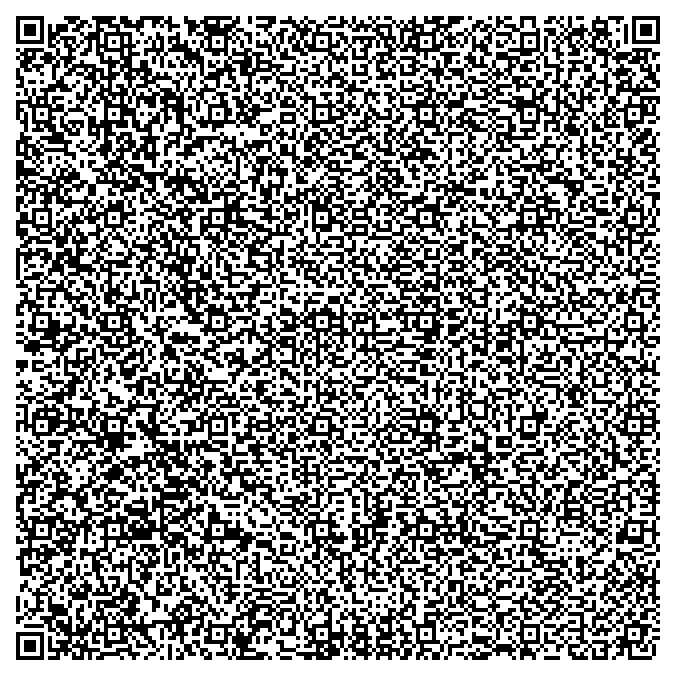

In [ ]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')